# Quinta entrega (nueva sección al final)
## El dataset seleccionado para poder efectuar el análisis es el "all_bikez_curated"

##### El dataset en cuestión contiene información del mercado de motocicletas y si bien no tenemos su valor de mercado, contamos con un rating que va del 0 al 5 en donde se puntúa la performance general de las motocicletas listadas. Trabajaremos con variables tales como la marca, año, categoría, fuerza del motor, suspensiones trasera y delantera y otras variables que veremos a medida que avancemos con el modelo.
##### El objetivo de este análisis será proporcionar un modelo que permita evaluar de antemano el rating que puede llegar a obtener una motocicleta dentro del mercado. Debido a las características de la base de dato, debemos ser conscientes que la mayoría de variables a trabajar son cualitativas. Las únicas varibles cuantitativas presentes son las cilindradas de las motos, el rating que obtuvieron y el torque. 
##### Cabe destacar que una gran falencia del dataset en cuestión es que no posee los precios de las motocicletas a trabajar. Por ello nos vamos a enfocar en las características técnicas únicamente y veremos si hay características que influyan de manera notoria en el rating obtenido

## 1) Limpieza del DATASET

In [1]:
! pip install -q chart_studio
! pip install -q bqplot
! pip install -q pingouin
import pandas as pd
from   scipy import stats
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
from os import listdir
from os.path import isfile, join
import statsmodels.api as sm
import statsmodels.formula.api as sm1
import chart_studio.plotly as py
import os


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python -m pip install --upgrade pip


In [2]:
df = pd.read_csv('/workspaces/codespaces-blank/Datasets/all_bikez_curated.csv')
df.columns =[column.replace(" ", "_") for column in df.columns]
df.columns =[column.replace(")", "") for column in df.columns]
df.columns =[column.replace("(", "") for column in df.columns]


df.shape

df

/tmp/ipykernel_30136/4106904573.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/workspaces/codespaces-blank/Datasets/all_bikez_curated.csv')


,Brand,Model,Year,Category,Rating,Displacement_ccm,Power_hp,Torque_Nm,Engine_cylinder,Engine_stroke,...,Dry_weight_kg,Wheelbase_mm,Seat_height_mm,Front_brakes,Rear_brakes,Front_tire,Rear_tire,Front_suspension,Rear_suspension,Color_options
0,acabion,da vinci 650-vi,2011,Prototype / concept model,3.2,NaN,804.0,NaN,Electric,Electric,...,420.0,NaN,NaN,Single disc,Single disc,NaN,NaN,NaN,NaN,NaN
1,acabion,gtbo 55,2007,Sport,2.6,1300.0,541.0,420.0,In-line four,four-stroke,...,360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,acabion,gtbo 600 daytona-vi,2011,Prototype / concept model,3.5,NaN,536.0,NaN,Electric,Electric,...,420.0,NaN,NaN,Single disc,Single disc,NaN,NaN,NaN,NaN,NaN
3,acabion,gtbo 600 daytona-vi,2021,Prototype / concept model,NaN,NaN,536.0,NaN,Electric,Electric,...,420.0,NaN,NaN,Single disc,Single disc,NaN,NaN,NaN,NaN,NaN
4,acabion,gtbo 70,2007,Prototype / concept model,3.1,1300.0,689.0,490.0,In-line four,four-stroke,...,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Custom made.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38467,zündapp,z 22,1924,Sport,NaN,211.0,2.3,NaN,Single cylinder,two-stroke,...,NaN,NaN,NaN,NaN,NaN,2.25-24,2.25-24,Druid fork,Rigid,NaN
38468,zündapp,z 249,1923,Sport,NaN,249.0,2.8,NaN,Single cylinder,two-stroke,...,76.0,NaN,NaN,Expanding brake (drum brake),Expanding brake (drum brake),2.25-24,2.25-24,Druid fork,Rigid,NaN
38469,zündapp,z 249,1924,Sport,NaN,249.0,2.8,NaN,Single cylinder,two-stroke,...,76.0,NaN,NaN,Expanding brake (drum brake),Expanding brake (drum brake),2.25-24,2.25-24,Druid fork,Rigid,NaN
38470,zündapp,z 300,1928,Sport,NaN,298.0,26.0,NaN,Single cylinder,two-stroke,...,105.0,NaN,NaN,Expanding brake (drum brake),Expanding brake (drum brake),2.85-26,2.85-26,NaN,NaN,NaN


### Lo primero que hacemos es chequear la cantidad de datos nulos que aparecen como "NaN" en la base de datos. 

In [3]:
df_n = df.isna().sum()
df_n.head(5)

Brand           0
Model          28
Year            0
Category        0
Rating      16684
dtype: int64

### Como podemos observar, de los 38472 registros iniciales, 16684 no poseen el valor de rating, el cual nos interesa poder predecir con el modelo. Por ello, para poder trabajar el dataset de forma cómoda y poder llegar a conclusiones que tengan validez, lo primero que vamos a hacer es eliminar todas las filas en donde no se muestre el Rating que se le da a cada motocicleta y lo llamaremos "df2".

In [4]:
df2 = df.dropna(subset=['Rating'])

In [5]:
df2_nan = df2.isna().sum()
display(df2_nan)
display(df2.shape)

Brand                    0
Model                    4
Year                     0
Category                 0
Rating                   0
Displacement_ccm       104
Power_hp              6896
Torque_Nm            11724
Engine_cylinder         10
Engine_stroke           10
Gearbox               2219
Bore_mm               4604
Stroke_mm             4604
Fuel_capacity_lts     2802
Fuel_system           7242
Fuel_control          8344
Cooling_system        2048
Transmission_type     3241
Dry_weight_kg         9083
Wheelbase_mm          7441
Seat_height_mm        7328
Front_brakes           810
Rear_brakes            960
Front_tire            3899
Rear_tire             3889
Front_suspension      8602
Rear_suspension       8676
Color_options         9466
dtype: int64

(21788, 28)

### Al hacer esto nos quedan un total de 21788 registros y también observar la cantidad de valores NAN que tenemos en cada columna para poder comprender al detalle qué precisión podemos lograr con cada característica. La única variable de importancia que tiene una gran cantidad de datos en blanco es la del Torque.

In [6]:
df2_1 = df2.dropna(subset=['Torque_Nm'])
df2_1_nan = df2_1.isna().sum()
display(df2_1_nan)
display(df2_1.shape)


Brand                   0
Model                   2
Year                    0
Category                0
Rating                  0
Displacement_ccm       57
Power_hp              917
Torque_Nm               0
Engine_cylinder         6
Engine_stroke           6
Gearbox               988
Bore_mm              2300
Stroke_mm            2300
Fuel_capacity_lts    1420
Fuel_system          2355
Fuel_control         4178
Cooling_system       1245
Transmission_type    1696
Dry_weight_kg        2793
Wheelbase_mm         1947
Seat_height_mm       1492
Front_brakes          413
Rear_brakes           521
Front_tire           1979
Rear_tire            1995
Front_suspension     3272
Rear_suspension      3291
Color_options        3431
dtype: int64

(10064, 28)

### Para poder trabajar con los campos NaN de forma directa vamos a convertirlos en valor cero y excluirlos del dataset. Si bien perdimos 18400 registros en el proceso, nos quedamos con los más representativos y que cumplen de forma más acertada con lo que estamos buscando.

In [7]:
df['Torque_Nm'] = df['Torque_Nm'].fillna(0)
df['Rating'] = df['Rating'].fillna(0)
df['Displacement_ccm'] = df['Displacement_ccm'].fillna(0)


In [8]:
Frecuencia_estilos = df['Category'].value_counts()
Frecuencia_estilos

Scooter                      6669
Sport                        5552
Enduro / offroad             4267
Custom / cruiser             4160
Naked bike                   3242
Allround                     3141
Classic                      1883
Super motard                 1634
Touring                      1573
ATV                          1481
Sport touring                1364
Cross / motocross            1243
Unspecified category          805
Trial                         558
Minibike, cross               529
Prototype / concept model     209
Minibike, sport               141
Speedway                       21
Name: Category, dtype: int64

### Además también procedemos a eliminar los que pertenecen las categorías "Prototype / concept model" y "Unspecified category" porque no nos permitirían evaluar correctamente los modelos. Finalmente volvemos a indexar el registro con el que vamos a terminar trabajando.

In [9]:
df3 = df.query('Torque_Nm != 0 & Rating != 0 & Category != "Prototype / concept model" & Category != "Unspecified category" & Displacement_ccm != 0')
df3 = df3.reset_index()
df3.index = df3.index+1
display(df3.head(3))
display(df3.shape)

,index,Brand,Model,Year,Category,Rating,Displacement_ccm,Power_hp,Torque_Nm,Engine_cylinder,...,Dry_weight_kg,Wheelbase_mm,Seat_height_mm,Front_brakes,Rear_brakes,Front_tire,Rear_tire,Front_suspension,Rear_suspension,Color_options
1,1,acabion,gtbo 55,2007,Sport,2.6,1300.0,541.0,420.0,In-line four,...,360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,35,adiva,ad 125,2009,Scooter,2.8,124.0,14.8,12.0,Single cylinder,...,175.0,1759.0,NaN,Single disc,Single disc,120/70-14,140/70-14,Telescopic fork,Twin shock,"Silver, black"
3,36,adiva,ad 125,2011,Scooter,2.9,124.0,13.0,10.9,Single cylinder,...,171.0,1640.0,NaN,Single disc,Single disc,120/70-14,140/70-14,Telescopic fork,Twin shock,NaN


(9788, 29)

In [10]:
Promedio_rating = df3['Rating'].mean()
Median_rating = df3['Rating'].median()

In [11]:
#fig,ax= plt.subplots(figsize=(30,6))
#ax.bar(df3['Category'], df3 ['Rating'])
#ax.axhline(Promedio_rating, color='red', linestyle='--', alpha=0.5,    linewidth=3, label='Rating promedio')
#ax.axhline(Median_rating, color='green', linestyle='-', alpha=0.5,    linewidth=3, label='Mediana del ratio')
#ax.legend()

### El gráfico en cuestión nos da una perspectiva general de los ratings que pueden llegar a tener los diferentes estilos de motos, siendo los más desbeneficiados los estilos Cross, Minibike Sport y Minibike Cross.

### Ahora vamos a hacer un gráfico para dimensionar la cantidad de motos existentes en cada modelo

In [12]:
Frecuencia_estilos1 = df3['Category'].value_counts()

Text(0, 0.5, 'Cantidad')

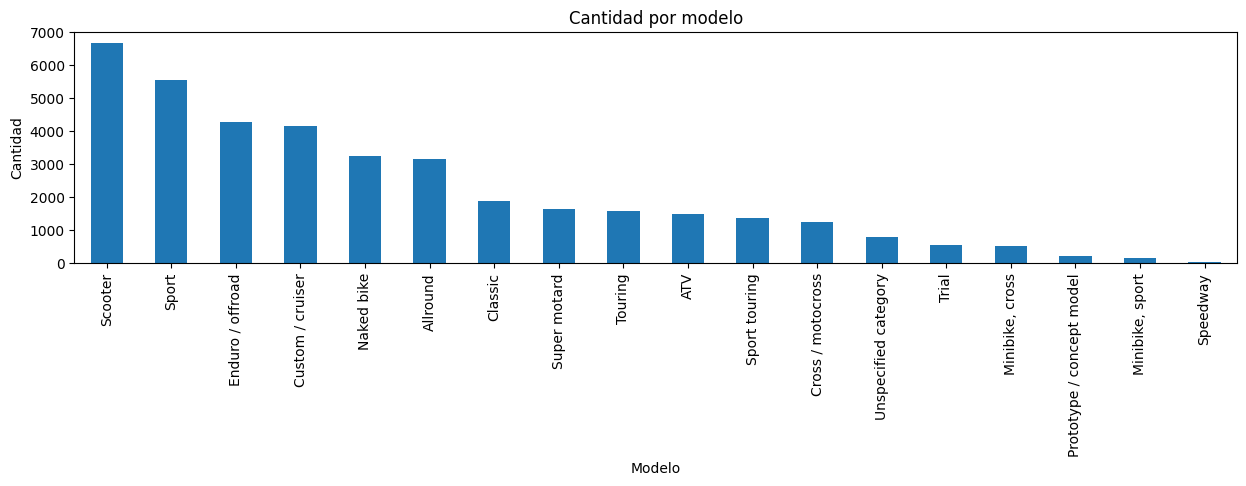

In [13]:
ax= Frecuencia_estilos.plot(kind='bar',figsize=(15,3), title="Cantidad por modelo")
ax.set_xlabel("Modelo")
ax.set_ylabel("Cantidad")

### Con este gráfico nos podemos hacer una idea de los estilos más representativos de la muestra que tomamos para poder efectuar el análisis. Justamente los que menor rating tenían también eran los modelos de moto que menos aparecen en la muestra tomada. Por ello mismo, dada su poca representatividad, vamos a proceder a eliminarlos de la base de datos y quedarnos con los modelos que tienen mayor relevancia.

In [14]:
df3_1 = df3.query('Category != "Trial" & Category != "Minibike, cross" & Category != "Minibike, sport" & Category != "Cross / motocross" & Category != "ATV"')
df3_1

,index,Brand,Model,Year,Category,Rating,Displacement_ccm,Power_hp,Torque_Nm,Engine_cylinder,...,Dry_weight_kg,Wheelbase_mm,Seat_height_mm,Front_brakes,Rear_brakes,Front_tire,Rear_tire,Front_suspension,Rear_suspension,Color_options
1,1,acabion,gtbo 55,2007,Sport,2.6,1300.0,541.0,420.0,In-line four,...,360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,35,adiva,ad 125,2009,Scooter,2.8,124.0,14.8,12.0,Single cylinder,...,175.0,1759.0,NaN,Single disc,Single disc,120/70-14,140/70-14,Telescopic fork,Twin shock,"Silver, black"
3,36,adiva,ad 125,2011,Scooter,2.9,124.0,13.0,10.9,Single cylinder,...,171.0,1640.0,NaN,Single disc,Single disc,120/70-14,140/70-14,Telescopic fork,Twin shock,NaN
4,37,adiva,ad 125le,2010,Scooter,1.9,124.0,13.0,10.9,Single cylinder,...,171.0,1640.0,NaN,Single disc,Single disc,120/70-14,140/70-14,Telescopic fork,Twin shock,"Silver, black"
5,38,adiva,ad 200,2011,Scooter,3.4,171.2,15.8,15.3,Single cylinder,...,172.0,1560.0,NaN,Single disc,Single disc,120/70-14,140/70-14,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9784,38293,zontes,zt125-g1 scrambler,2021,Sport,3.8,125.0,14.5,13.0,Single cylinder,...,160.0,1320.0,795.0,"Single disc. ABS, twin-piston caliper",Single disc. ABS,110/70-17,130/60-17,"37mm USD forks, non adjustable","Single shock, non adjustable",Gloss Black/ Matt Graphite
9785,38294,zontes,zt125-u,2021,Naked bike,3.9,125.0,14.5,13.0,Single cylinder,...,106.0,1320.0,755.0,Single disc. ABS,Single disc. ABS,3.00-17,110/90-17,Telescopic,Aluminium rear swing arm. Monoshock.,Graphite-Red/Orange
9786,38296,zontes,zt250-s,2018,Sport,3.2,249.0,24.1,23.0,Single cylinder,...,144.0,1384.0,790.0,Single disc,Single disc,110/70-R17,150/55-R17,Telescopic fork,Swingarm,"Red, black, green, blue"
9787,38297,zontes,zt310-r,2018,Naked bike,3.3,312.0,34.9,30.0,Single cylinder,...,145.0,1390.0,795.0,Single disc. ABS,Single disc. ABS,110/70-R17,160/60-R17,Telescopic,Central nitrogen absorber,Blue


### El dataset "df3_1" va a ser el dataset definitivo con el cual vamos a evaluar las hipótesis a plantear y utilizar para generar un modelo predictivo

# 2)Análisis e Hipótesis

## Hipótesis: En el mercado de las motos, la cilindrada de las mismas y sus estilos impactan de forma directa al rating obtenido por sus usuarios. Además, el estilo de moto define en su mayoría algunas otras características técnicas que también influyen en el rating obtenido.

Text(0, 0.5, 'Cantidad')

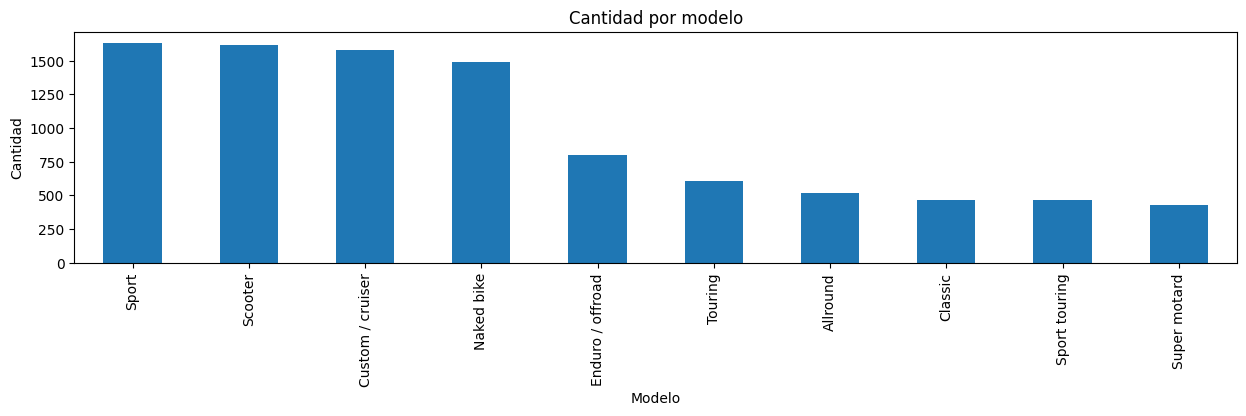

In [15]:
Frecuencia_estilos2 = df3_1['Category'].value_counts()
ax= Frecuencia_estilos2.plot(kind='bar',figsize=(15,3), title="Cantidad por modelo")
ax.set_xlabel("Modelo")
ax.set_ylabel("Cantidad")

### Para poder generar un gráfico en donde contenga el rating según la cilindrada de la moto primero debemos generar una columna con dicha clasificación.

In [16]:
bins = [-500, 150, 300, 450, 600, 900, np.inf]
names = ['<150', '150-300', '300-450', '450-600', '600-900', '900++']

df3_1['Displacement_range'] = pd.cut(df3_1['Displacement_ccm'], bins, labels=names)
cilindradas = df3_1['Displacement_range'].astype(str)

display(df3_1['Displacement_range'].value_counts())
display(df3_1[['Displacement_ccm', 'Displacement_range']])

/tmp/ipykernel_30136/1662581171.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_1['Displacement_range'] = pd.cut(df3_1['Displacement_ccm'], bins, labels=names)
/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arrays/categorical.py:555: RuntimeWarning: invalid value encountered in cast
  np.array(self.categories._na_value).astype(dtype)


900++      3568
<150       2145
600-900    2005
150-300     939
450-600     640
300-450     309
Name: Displacement_range, dtype: int64

,Displacement_ccm,Displacement_range
1,1300.0,900++
2,124.0,<150
3,124.0,<150
4,124.0,<150
5,171.2,150-300
...,...,...
9784,125.0,<150
9785,125.0,<150
9786,249.0,150-300
9787,312.0,300-450


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


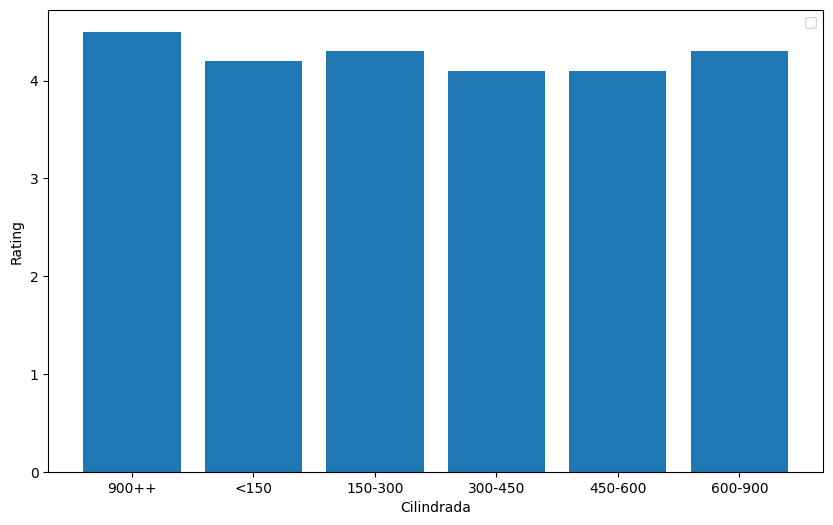

In [17]:
fig,ax= plt.subplots(figsize=(10,6))
ax.bar(cilindradas, df3_1['Rating'])
ax.set_xlabel("Cilindrada")
ax.set_ylabel("Rating")
ax.legend()

### En este primer gráfico que trabaja con el promedio, parecería no haber mucha diferencia en el rating si se comparan motod de diferentes cilindrajes. Pero, en el gráfico de abajo l cambiar el estilo de gráfico a un boxplot y separando por categoría podemos observar de forma más precisa que el cilindraje sí modifica el Rating, asi como también el estilo de moto.

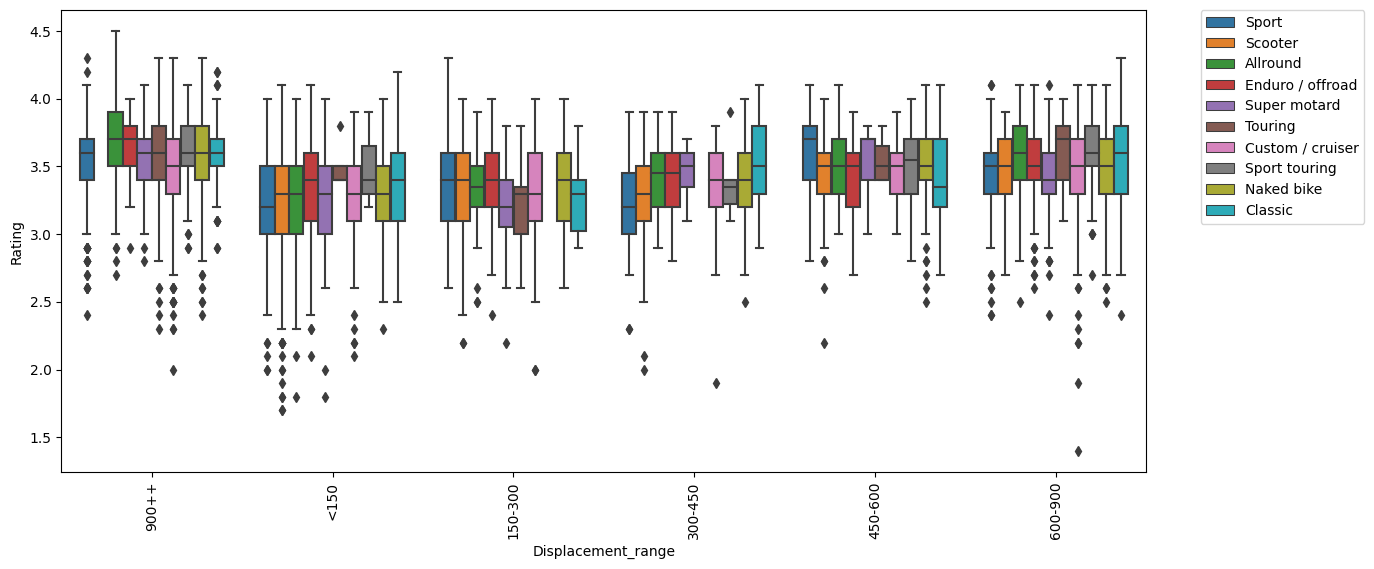

In [18]:
plt.subplots(figsize=(14,6))
sns.boxplot(data=df3_1, x=cilindradas, y="Rating", hue="Category", )
plt.xticks(rotation='vertical')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Sport'),
  Text(1, 0, 'Scooter'),
  Text(2, 0, 'Allround'),
  Text(3, 0, 'Enduro / offroad'),
  Text(4, 0, 'Super motard'),
  Text(5, 0, 'Touring'),
  Text(6, 0, 'Custom / cruiser'),
  Text(7, 0, 'Sport touring'),
  Text(8, 0, 'Naked bike'),
  Text(9, 0, 'Classic')])

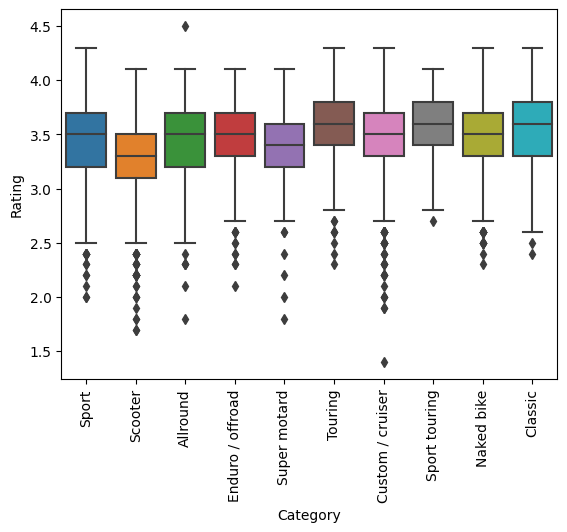

In [19]:
sns.boxplot(data=df3_1, x="Category", y="Rating")
plt.xticks(rotation='vertical')

### Identificamos un gran problema y es la cantidad de outliers que se encuentran por debajo del mínimo del boxplot. Por ello vamos a buscar una manera de eliminar dichas filas e intentar conseguir un dataset más limpio en este aspecto.

(0.0, 2000.0)

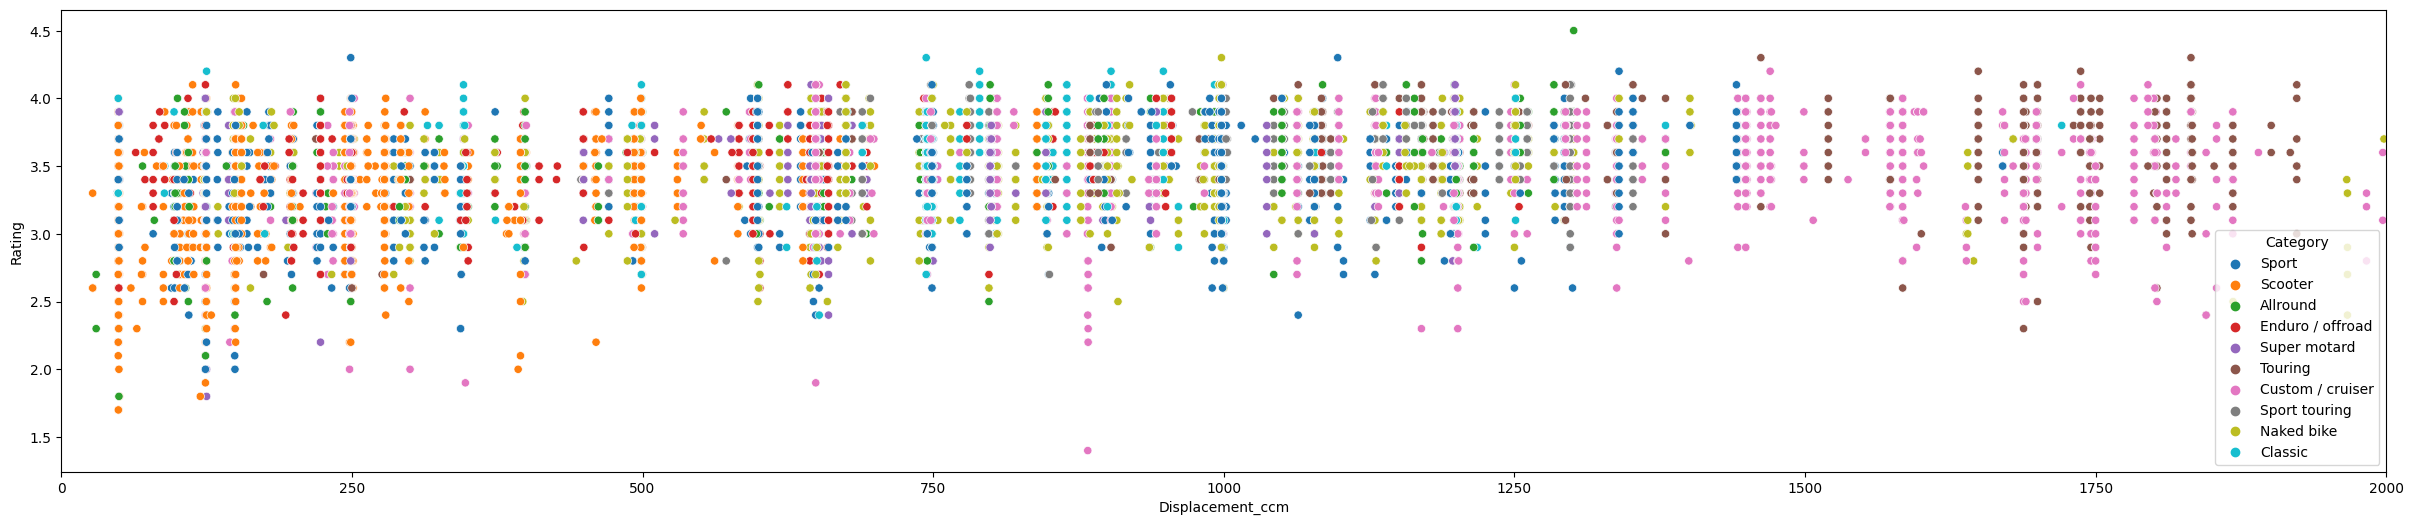

In [20]:
fig,ax= plt.subplots(figsize=(30,6))
ax=sns.scatterplot(df3_1 ,x="Displacement_ccm", y="Rating", hue="Category")
ax.set_xlim(0, 2000)


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '<150'),
  Text(1, 0, '150-300'),
  Text(2, 0, '300-450'),
  Text(3, 0, '450-600'),
  Text(4, 0, '600-900'),
  Text(5, 0, '900++')])

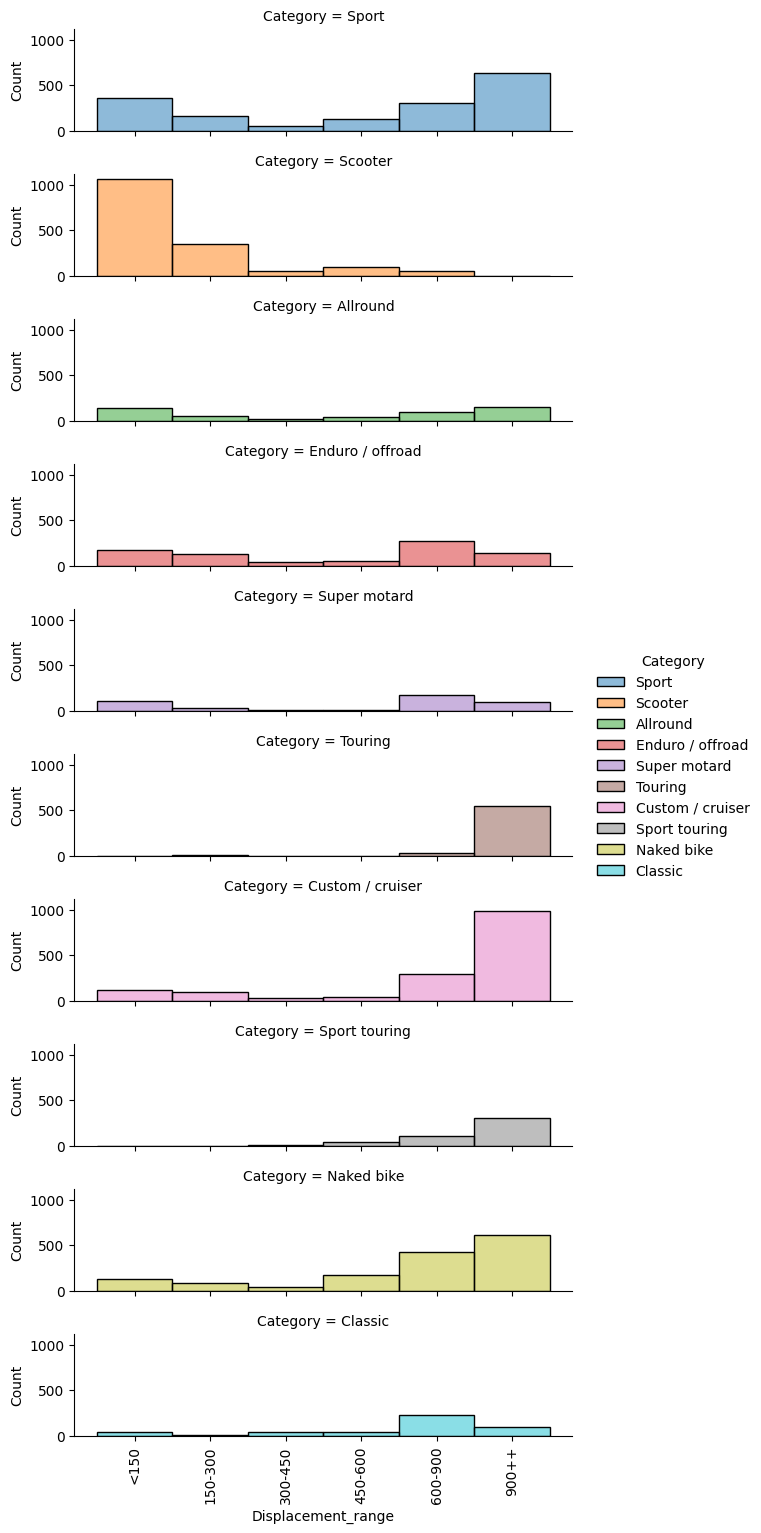

In [21]:
fig.subplots(5,2)
sns.displot(df3_1 ,x="Displacement_range",row='Category' , hue="Category", aspect=4, height=1.5)
plt.xticks(rotation='vertical')

### A modo de complemento con la información antes expuesta, hicimos gráficos en donde se pueda ver la distribución de los estilos de motos según cilindrada y también el rating que obtiene cada estilo. Al ser variables cualitativas no es sencillo evaluar correlación entre las mismas. Pero de esta forma nos podemos dar una idea mucho más precisa que hay estilos en donde predomina ciertos cilindrajes. Por ejemplo en el caso de la scooter la mayoría de las motos se encuentran por debajo de las 150 cilindradas. 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'In-line four'),
  Text(1, 0, 'Single cylinder'),
  Text(2, 0, 'Four cylinder boxer'),
  Text(3, 0, 'V2'),
  Text(4, 0, 'Twin'),
  Text(5, 0, 'V4'),
  Text(6, 0, 'V8'),
  Text(7, 0, 'In-line three'),
  Text(8, 0, 'Two cylinder boxer'),
  Text(9, 0, 'In-line six'),
  Text(10, 0, 'Diesel'),
  Text(11, 0, 'Six cylinder boxer'),
  Text(12, 0, 'V6'),
  Text(13, 0, 'Radial'),
  Text(14, 0, 'Dual disk Wankel')])

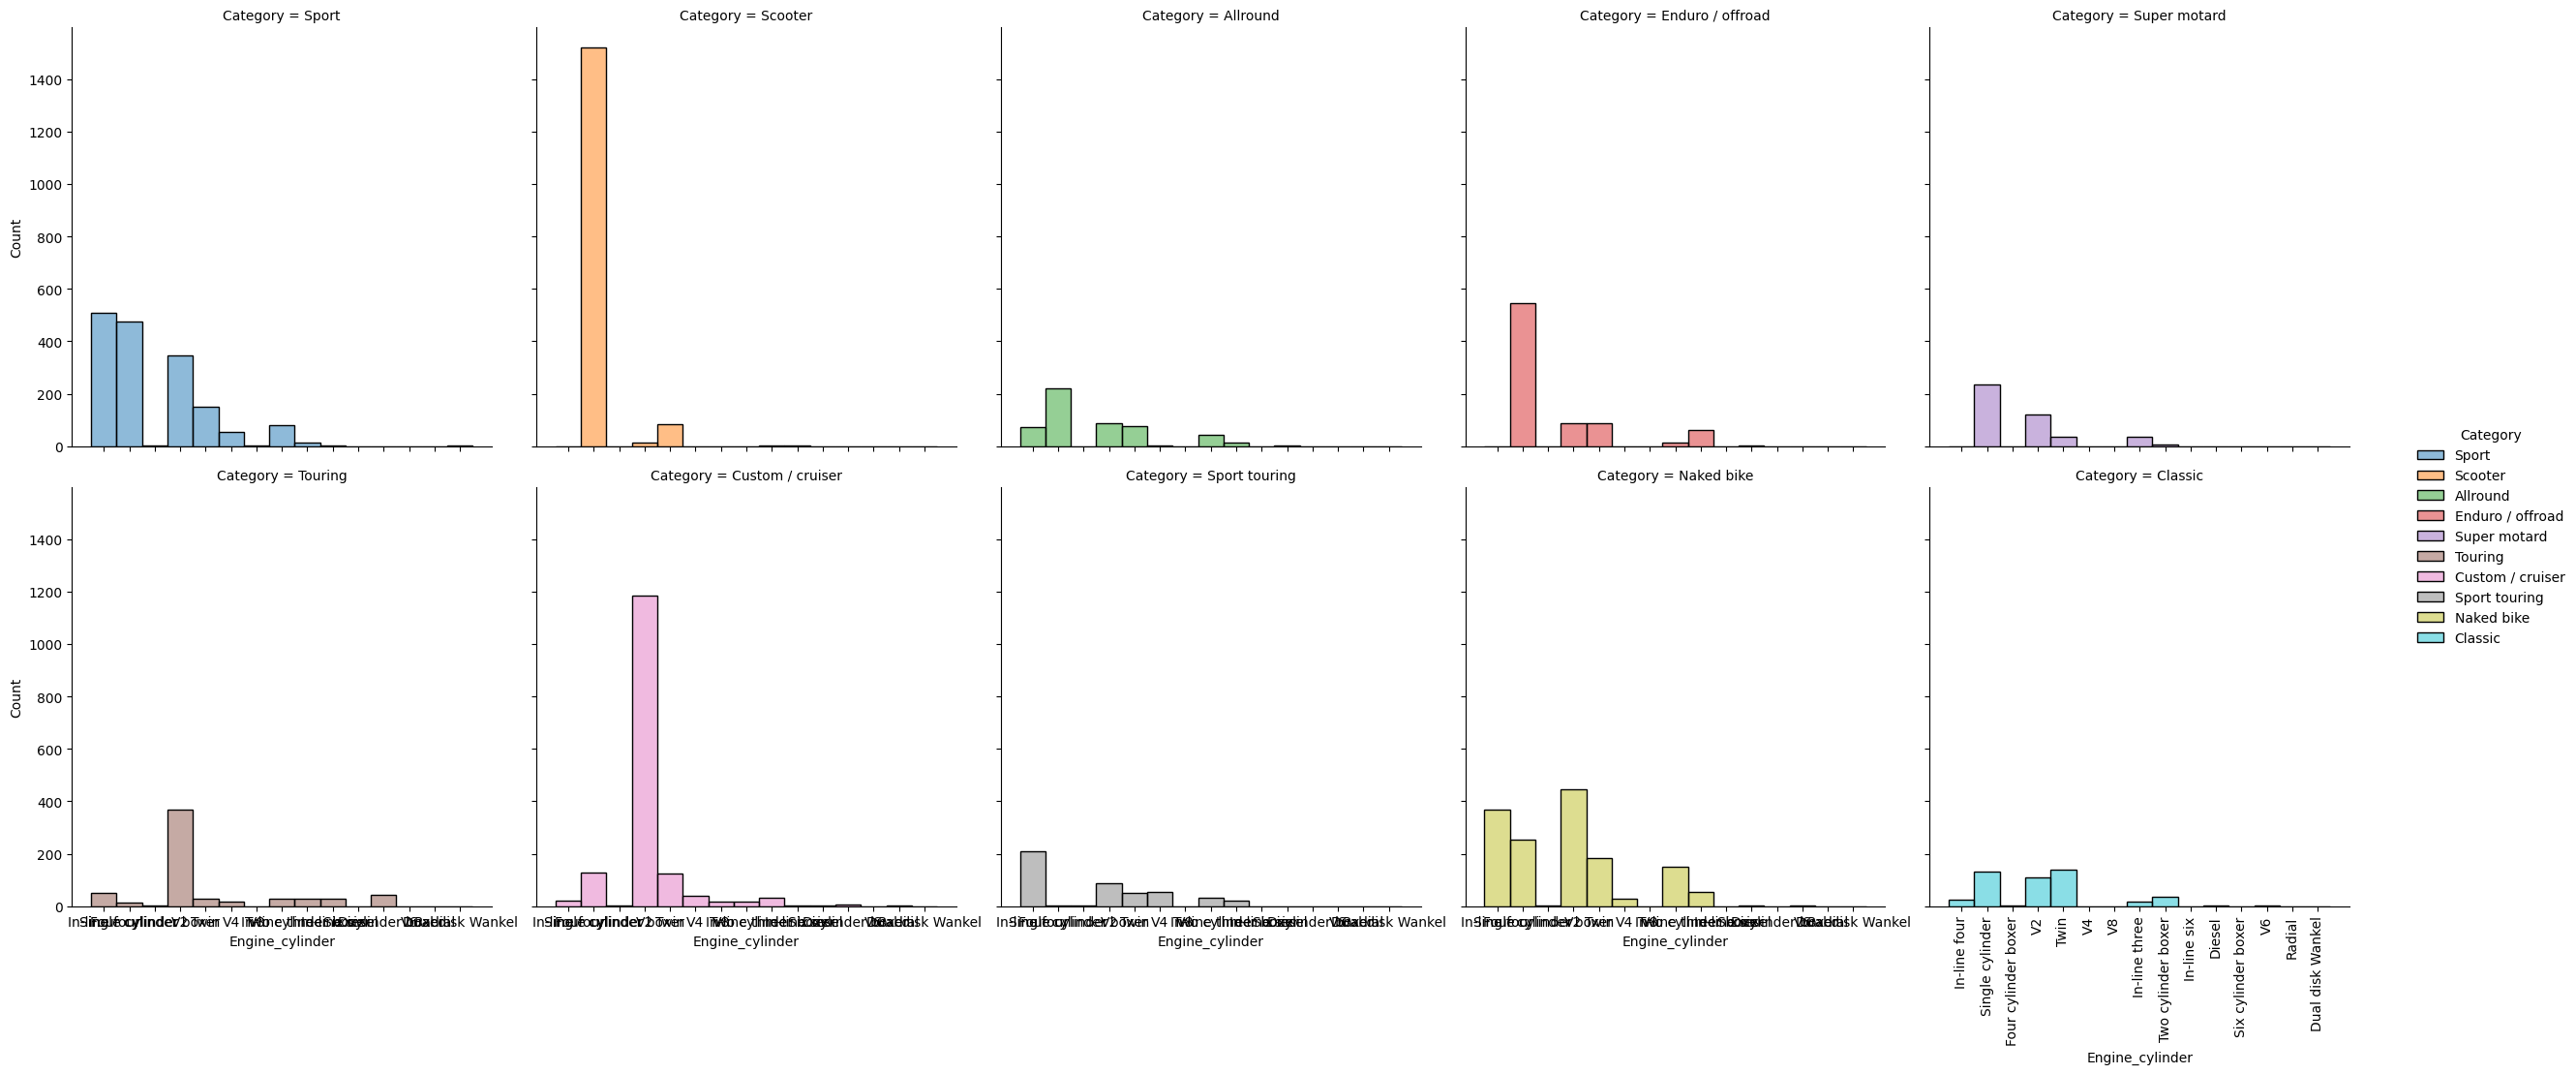

In [22]:
g=sns.displot(df3_1 ,x="Engine_cylinder", hue='Category', col='Category', col_wrap=5)
plt.xticks(rotation='vertical')

#### El gráfico en cuestión permite ver el tipo de motor predominante dentro de cada categoría de moto. Observamos que hay tipos de motor que predominan por sobre el resto en estilos como el scooter. Para análisis posteriores podremos agregar esta dimensión y evaluar si efectivamente influyen en el rating o en cambio es una variable que no tiene mucha importancia.

### A modo de conclusión podemos afirmar que al complementar esta info con la anterior (en donde vimos mediante un gráfico de caja y bigotes que las scooter tenían ratings más bajos que el resto) tanto el modelo y el cilindraje están vinculados entre sí y generan un efecto directo en el rating. En análisis posteriores entraremos en mayor detalle con análisis en mayor profundidad e ncluyendo otras variables tales como la marca

# 3) Análisis en profundidad

### Para esta parte del proyecto vamos a trabajar con algunas herrmaientas más avanzadas como son los algoritmos de regresión y ver qué incidencia tienen las variables ya trabajadas dentro del proyecto

#### Lo primero que haremos es limpiar los outliers existentes para cada categoría dividida por cilindradas

In [23]:
#Creo grupos y procedo a establecer límites superiores e inferiores
grupos = df3_1.groupby(['Category', 'Displacement_range'])

In [24]:
def remove_outliers(group):
    q1 = group['Rating'].quantile(0.25)
    q3 = group['Rating'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return group.drop(group[(group['Rating'] < lower_bound) | (group['Rating'] > upper_bound)].index)

In [25]:
#.reset_index().drop(['Category', 'Displacement_range'], axis=1
df3_11 = grupos.apply(remove_outliers)
df3_11 = df3_11.drop(['Category', 'Displacement_range'], axis=1)
df3_11 = df3_11.reset_index().drop(['level_2', 'index'], axis=1)
df3_11.head(5)

,Category,Displacement_range,Brand,Model,Year,Rating,Displacement_ccm,Power_hp,Torque_Nm,Engine_cylinder,...,Dry_weight_kg,Wheelbase_mm,Seat_height_mm,Front_brakes,Rear_brakes,Front_tire,Rear_tire,Front_suspension,Rear_suspension,Color_options
0,Allround,<150,aeon,my 125i,2012,3.6,124.9,10.7,8.3,Single cylinder,...,108.0,1210.0,735.0,Single disc,Expanding brake (drum brake),120/80-14,120/80-14,Telescopic fork,Single shock,"Black, red, green"
1,Allround,<150,ajs,highway star 125,2020,2.8,124.0,11.3,9.4,Single cylinder,...,164.0,1460.0,710.0,Double disc,Single disc,120/80-17,140/70-17,Telescopic fork,Twin shocks,"Black,White, Blue, Red"
2,Allround,<150,bajaj,platina 125 dumdar sawari,2011,3.5,124.6,8.5,10.0,Single cylinder,...,99.0,1275.0,NaN,Expanding brake (drum brake),Expanding brake (drum brake),2.75-17,3.00-17,"Hydraulic, Telescopic Type","Hydraulic, SNS Type",Black
3,Allround,<150,benelli,trk 125,2019,3.3,124.8,12.6,10.0,Single cylinder,...,153.0,1380.0,835.0,Single disc. ABS,Single disc. ABS,110/70-17,150/60-17,Telescopic fork,Rear swing arm with central shock absorber wit...,"Red, Black, White"
4,Allround,<150,bintelli,beast 49,2018,3.3,49.0,3.2,2.8,Single cylinder,...,105.7,NaN,787.0,Single disc,Expanding brake (drum brake),120/70-12,120/70-12,Straight fork,Single shock,"Black, Green, Red"


### Para tener mayor simplicidad a la hora de trabajar, convertimos el df3_11 en df4 y cambiamos el tipo de variable de la columna "Displacement_range" a tipo objeto para poder trabajarla de forma correcta más adelante

In [26]:
df3_11['Displacement_range'] = df3_11['Displacement_range'].astype('object')
df4=df3_11

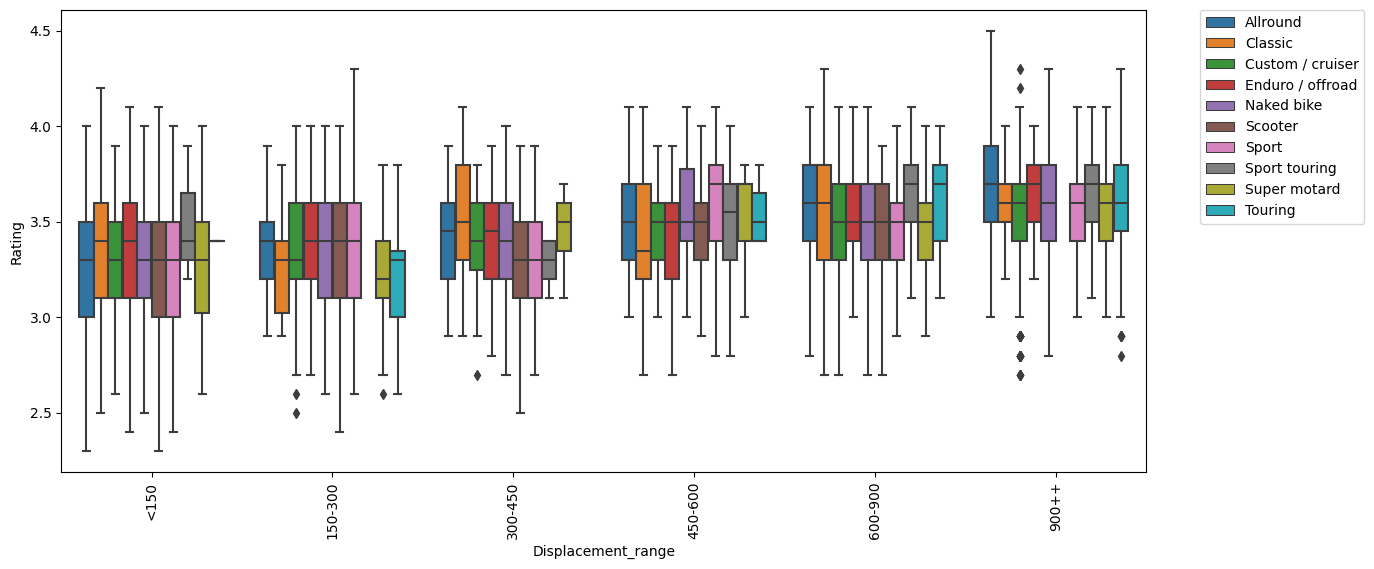

In [27]:
plt.subplots(figsize=(14,6))
sns.boxplot(data=df4, x='Displacement_range', y="Rating", hue="Category")
plt.xticks(rotation='vertical')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Allround'),
  Text(1, 0, 'Classic'),
  Text(2, 0, 'Custom / cruiser'),
  Text(3, 0, 'Enduro / offroad'),
  Text(4, 0, 'Naked bike'),
  Text(5, 0, 'Scooter'),
  Text(6, 0, 'Sport'),
  Text(7, 0, 'Sport touring'),
  Text(8, 0, 'Super motard'),
  Text(9, 0, 'Touring')])

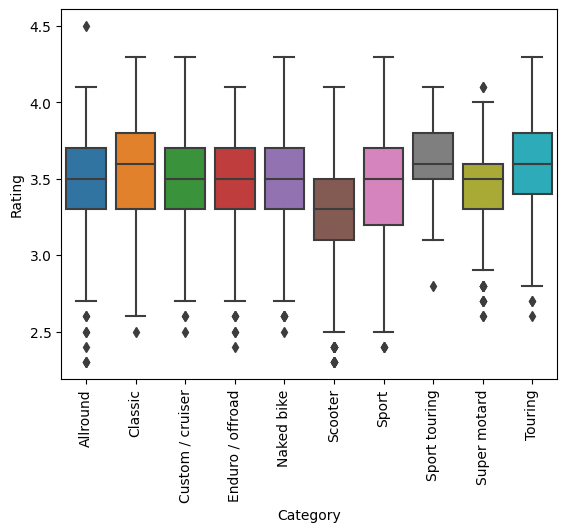

In [28]:
sns.boxplot(data=df4, x="Category", y="Rating")
plt.xticks(rotation='vertical')

### Como resultado de este proceso si bien no eliminamos por completo los outliers, esto se debe a que las filas con valores de outliers las eliminamos y no les reemplazamos su valor. Al ser eliminadas modificaron a su vez los valores estadísticos y generaron nuevos outliers, pero estos no nos preocupan.

In [29]:
print(df4['Gearbox'].unique())

['5-speed' 'Automatic' '6-speed' nan '4-speed' '3-speed' '10-speed'
 '1-speed' '7-speed' '6-speed with reverse']


In [30]:
model1 = 'Rating~Displacement_ccm+Power_hp+Gearbox+Engine_cylinder'
lm1   = sm1.ols(formula = model1, data = df4).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     68.06
Date:                Sat, 04 Mar 2023   Prob (F-statistic):          2.07e-276
Time:                        17:49:42   Log-Likelihood:                -1286.2
No. Observations:                7720   AIC:                             2618.
Df Residuals:                    7697   BIC:                             2778.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

### Como insight destacable podemos observar que el modelo de regresión tiene un r cuadrado realmente bajo y los valores de P>|t| son demasiado elevado como para tener validez. Si bien antes observamos que había diferencia entre el cilindraje y el Rating, la correlación no parece ser tan lineal.

In [31]:
model2 = 'Rating~Brand'
lm1   = sm1.ols(formula = model2, data = df4).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     11.53
Date:                Sat, 04 Mar 2023   Prob (F-statistic):          3.59e-285
Time:                        17:49:43   Log-Likelihood:                -1546.0
No. Observations:                9430   AIC:                             3458.
Df Residuals:                    9247   BIC:                             4767.
Df Model:                         182                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [32]:
model3 = 'Rating~Year'
lm1   = sm1.ols(formula = model3, data = df4).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     82.10
Date:                Sat, 04 Mar 2023   Prob (F-statistic):           1.55e-19
Time:                        17:49:43   Log-Likelihood:                -2469.2
No. Observations:                9430   AIC:                             4942.
Df Residuals:                    9428   BIC:                             4957.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.1104      0.844     13.164      0.0

### En el caso de la marca la correlación parecería ser más fuerte que lo probado anteriormente, mientras que el año no influye en absolutamente nada y no es una variable representativa. De todas formas, hay algunas marcas que tienen un valor alto de P>|t|, por lo que no serían válidos.

In [33]:
model4 = 'Rating~Fuel_system+Displacement_ccm'
lm1   = sm1.ols(formula = model4, data = df4).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     2.541
Date:                Sat, 04 Mar 2023   Prob (F-statistic):          3.31e-105
Time:                        17:49:47   Log-Likelihood:                -651.82
No. Observations:                7409   AIC:                             3338.
Df Residuals:                    6392   BIC:                         1.037e+04
Df Model:                        1016                                         
Covariance Type:            nonrobust                                         
                                                                                                                                                                                                                  

#### En esta entrega pudimos evaluar al detalle algunas de las características que habíamos identificado como de mayor peso, limpiamos la base de datos quitando los ouliers presentes dentro de cada categoría y analizamos la repercusión lineal de las variables. Además pudimos crear gráficos más adecuados y mejorar la visualización de la info.

### Como conclusión parcial podemos afirmar que no hay ninguna característica dominante a la hora de definir el Rating. Habrá que evaluar en análisis posteriores si es posible crear grupos mediante un análisis no supervisado que permita identificar patrones o grupos que no se pueden determinar a simple vista. Para ello será necesario probar diferentes modelos de aprendizaje no supervisado y evaluar los resultados pertinentes


## 4) Feature selection con algoritmos

##### Lo primero que haremos en este caso será distinguir entre columnas categóricas y numéricas para poder aplicar los algoritmos vistos en clase.

In [34]:
print(df4.shape)
df4.head(5)

(9430, 29)


,Category,Displacement_range,Brand,Model,Year,Rating,Displacement_ccm,Power_hp,Torque_Nm,Engine_cylinder,...,Dry_weight_kg,Wheelbase_mm,Seat_height_mm,Front_brakes,Rear_brakes,Front_tire,Rear_tire,Front_suspension,Rear_suspension,Color_options
0,Allround,<150,aeon,my 125i,2012,3.6,124.9,10.7,8.3,Single cylinder,...,108.0,1210.0,735.0,Single disc,Expanding brake (drum brake),120/80-14,120/80-14,Telescopic fork,Single shock,"Black, red, green"
1,Allround,<150,ajs,highway star 125,2020,2.8,124.0,11.3,9.4,Single cylinder,...,164.0,1460.0,710.0,Double disc,Single disc,120/80-17,140/70-17,Telescopic fork,Twin shocks,"Black,White, Blue, Red"
2,Allround,<150,bajaj,platina 125 dumdar sawari,2011,3.5,124.6,8.5,10.0,Single cylinder,...,99.0,1275.0,NaN,Expanding brake (drum brake),Expanding brake (drum brake),2.75-17,3.00-17,"Hydraulic, Telescopic Type","Hydraulic, SNS Type",Black
3,Allround,<150,benelli,trk 125,2019,3.3,124.8,12.6,10.0,Single cylinder,...,153.0,1380.0,835.0,Single disc. ABS,Single disc. ABS,110/70-17,150/60-17,Telescopic fork,Rear swing arm with central shock absorber wit...,"Red, Black, White"
4,Allround,<150,bintelli,beast 49,2018,3.3,49.0,3.2,2.8,Single cylinder,...,105.7,NaN,787.0,Single disc,Expanding brake (drum brake),120/70-12,120/70-12,Straight fork,Single shock,"Black, Green, Red"


In [35]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9430 entries, 0 to 9429
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Category            9430 non-null   object 
 1   Displacement_range  9430 non-null   object 
 2   Brand               9430 non-null   object 
 3   Model               9429 non-null   object 
 4   Year                9430 non-null   int64  
 5   Rating              9430 non-null   float64
 6   Displacement_ccm    9430 non-null   float64
 7   Power_hp            8544 non-null   float64
 8   Torque_Nm           9430 non-null   float64
 9   Engine_cylinder     9424 non-null   object 
 10  Engine_stroke       9424 non-null   object 
 11  Gearbox             8534 non-null   object 
 12  Bore_mm             7468 non-null   float64
 13  Stroke_mm           7468 non-null   object 
 14  Fuel_capacity_lts   8109 non-null   float64
 15  Fuel_system         7409 non-null   object 
 16  Fuel_c

### Vamos a determinar que las columnas categóricas son aquellas que tienen menos de 15 elementos diferentes y son de tipo objeto. Mientras que las numéricas serán todas aquellas del tipo flotante o entero, que al mismo tiempo no puede ser la columna de Rating. Este proceso se efectúa debido a que el algoritmo utilizado sólo puede recibir columnas numéricas y nos sirve además para identificar columnas de interés.

In [36]:
Categorias = []
for col in df4.columns:
	if (df4[col].nunique()<15) and (df4[col].dtype=='object') or col == "Brand":
		Categorias.append(col) 
  
print('Columnas categoricas son {}'.format(Categorias))

Columnas categoricas son ['Category', 'Displacement_range', 'Brand', 'Engine_cylinder', 'Engine_stroke', 'Gearbox', 'Fuel_control', 'Cooling_system', 'Transmission_type']


In [37]:
Numericas= []
for col in df4.columns:
	if ((df4[col].dtype=='float64' or df4[col].dtype=='int64') and col != "Rating"):
		Numericas.append(col)

print('Columnas numéricas son {}'.format(Numericas))

Columnas numéricas son ['Year', 'Displacement_ccm', 'Power_hp', 'Torque_Nm', 'Bore_mm', 'Fuel_capacity_lts', 'Dry_weight_kg', 'Wheelbase_mm', 'Seat_height_mm']


##### Otro punto a tener en cuenta es que no podemos tener valores Nan en las columnas numéricas para poder aplicar correctamente los algoritmos. Si observamos

In [38]:
df4[Numericas].isna().sum()

Year                    0
Displacement_ccm        0
Power_hp              886
Torque_Nm               0
Bore_mm              1962
Fuel_capacity_lts    1321
Dry_weight_kg        2670
Wheelbase_mm         1676
Seat_height_mm       1387
dtype: int64

In [39]:
df4[Numericas] = df4.groupby(['Category', 'Displacement_range'], group_keys=False)[Numericas].apply(lambda x:x.fillna(x.mean()))

In [40]:
df4[Numericas].isna().sum()

Year                 0
Displacement_ccm     0
Power_hp             0
Torque_Nm            0
Bore_mm              0
Fuel_capacity_lts    0
Dry_weight_kg        0
Wheelbase_mm         0
Seat_height_mm       3
dtype: int64

In [41]:
df4 = df4.dropna(subset=["Seat_height_mm"])
df4[Numericas].isna().sum()

Year                 0
Displacement_ccm     0
Power_hp             0
Torque_Nm            0
Bore_mm              0
Fuel_capacity_lts    0
Dry_weight_kg        0
Wheelbase_mm         0
Seat_height_mm       0
dtype: int64

In [42]:
df4 = df4.reset_index()
df4.head(5)

,index,Category,Displacement_range,Brand,Model,Year,Rating,Displacement_ccm,Power_hp,Torque_Nm,...,Dry_weight_kg,Wheelbase_mm,Seat_height_mm,Front_brakes,Rear_brakes,Front_tire,Rear_tire,Front_suspension,Rear_suspension,Color_options
0,0,Allround,<150,aeon,my 125i,2012,3.6,124.9,10.7,8.3,...,108.0,1210.000000,735.00,Single disc,Expanding brake (drum brake),120/80-14,120/80-14,Telescopic fork,Single shock,"Black, red, green"
1,1,Allround,<150,ajs,highway star 125,2020,2.8,124.0,11.3,9.4,...,164.0,1460.000000,710.00,Double disc,Single disc,120/80-17,140/70-17,Telescopic fork,Twin shocks,"Black,White, Blue, Red"
2,2,Allround,<150,bajaj,platina 125 dumdar sawari,2011,3.5,124.6,8.5,10.0,...,99.0,1275.000000,767.75,Expanding brake (drum brake),Expanding brake (drum brake),2.75-17,3.00-17,"Hydraulic, Telescopic Type","Hydraulic, SNS Type",Black
3,3,Allround,<150,benelli,trk 125,2019,3.3,124.8,12.6,10.0,...,153.0,1380.000000,835.00,Single disc. ABS,Single disc. ABS,110/70-17,150/60-17,Telescopic fork,Rear swing arm with central shock absorber wit...,"Red, Black, White"
4,4,Allround,<150,bintelli,beast 49,2018,3.3,49.0,3.2,2.8,...,105.7,1279.532258,787.00,Single disc,Expanding brake (drum brake),120/70-12,120/70-12,Straight fork,Single shock,"Black, Green, Red"


In [43]:
df4 = df4.drop(['index'], axis=1)
df4.head(5)

,Category,Displacement_range,Brand,Model,Year,Rating,Displacement_ccm,Power_hp,Torque_Nm,Engine_cylinder,...,Dry_weight_kg,Wheelbase_mm,Seat_height_mm,Front_brakes,Rear_brakes,Front_tire,Rear_tire,Front_suspension,Rear_suspension,Color_options
0,Allround,<150,aeon,my 125i,2012,3.6,124.9,10.7,8.3,Single cylinder,...,108.0,1210.000000,735.00,Single disc,Expanding brake (drum brake),120/80-14,120/80-14,Telescopic fork,Single shock,"Black, red, green"
1,Allround,<150,ajs,highway star 125,2020,2.8,124.0,11.3,9.4,Single cylinder,...,164.0,1460.000000,710.00,Double disc,Single disc,120/80-17,140/70-17,Telescopic fork,Twin shocks,"Black,White, Blue, Red"
2,Allround,<150,bajaj,platina 125 dumdar sawari,2011,3.5,124.6,8.5,10.0,Single cylinder,...,99.0,1275.000000,767.75,Expanding brake (drum brake),Expanding brake (drum brake),2.75-17,3.00-17,"Hydraulic, Telescopic Type","Hydraulic, SNS Type",Black
3,Allround,<150,benelli,trk 125,2019,3.3,124.8,12.6,10.0,Single cylinder,...,153.0,1380.000000,835.00,Single disc. ABS,Single disc. ABS,110/70-17,150/60-17,Telescopic fork,Rear swing arm with central shock absorber wit...,"Red, Black, White"
4,Allround,<150,bintelli,beast 49,2018,3.3,49.0,3.2,2.8,Single cylinder,...,105.7,1279.532258,787.00,Single disc,Expanding brake (drum brake),120/70-12,120/70-12,Straight fork,Single shock,"Black, Green, Red"


In [44]:
X = df4[Numericas]
Y= df4['Rating']

In [45]:
def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist() # lista con columnas
    best_features = [] # lista vacia para guardar features significativos
    while (len(initial_features)>0): # siempre y cuando esto sea mayor que 0 seguir
        remaining_features = list(set(initial_features)-set(best_features)) # operacion diferencia todas - features que van saliendo
        new_pval = pd.Series(index=remaining_features, dtype=np.float64) # seria para guardar p valores
        for new_column in remaining_features: # para las columnas restates seguir evaluando
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit() # ajustar el modelo con target agregando columnas de una en una
            new_pval[new_column] = model.pvalues[new_column] # agregar a la serie el p valor para cada feature
        min_p_value = new_pval.min() # encontrar el p valor minimo (mas significativo)
        if(min_p_value<significance_level): # verificar si es menor a alpha
            best_features.append(new_pval.idxmin()) # agregar el nombre del feature
        else:
            break # cuando no se cumpla la condicion parar y salir
    return best_features

In [46]:
forward_selection(X, Y)

['Fuel_capacity_lts',
 'Power_hp',
 'Year',
 'Bore_mm',
 'Seat_height_mm',
 'Wheelbase_mm']

### Ahora que tenemos las features importantes para el análisis vamos a desarrollar un modelo de regresión e implementarlo para ver qué resultados se obtienen con las variables que se obtuvieron con el método de forward selection.

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=3)

In [48]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)

In [49]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(Y_test,Y_pred))

MAE 0.23544950503142834


In [50]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(Y_test,Y_pred))

MSE 0.08709515384823617


In [51]:
print("RMSE",np.sqrt(mean_squared_error(Y_test,Y_pred)))

RMSE 0.29511888087385424


### Según las métricas obtenidas, el modelo tiene un MAE (error aboluto promedio) de 0,235. Esto implica que al predecir el rating de una moto según las features seleccionadas anteriormente hay un error de 0,235 de Rating como máximo, el RMSE tiene un valor de 0,295 lo cual es un poco mayor e indica menor precisión. Notoriamente, la medida que arroja un menor valor es la de "MSE" con un 0,87, lo cual es realmente positivo a la hora de validar el modelo.
### Eventualmente podría haber otra forma que permita una mayor precisión, pero teniendo en cuenta este primer análisis y que el Rating varía entre 2,3 y 4,8 aproximadamente (sin outliers), una precisión con un error de 0,23 o 0,29 es aceptable y quiere decir que las variables detectadas cumplen en gran medida con las exigencias del dataset.